<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/11_ajuste_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

# Ejercicio 11. Ajuste no polinomial por mínimos cuadrados
---

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_theme(palette='colorblind')

La siguiente tabla contiene el número de casos covid repostados durante los primeros 33 días de la pandemia en México.

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1hozFClbXaU1hjL5MzvNClzAEj5SS7W37ClknRcoU6-8/export?format=csv", header=2, index_col=3)
df2 = df[["Casos confirmados","Fallecimientos"]].copy()
df2.head(3)

,Casos confirmados,Fallecimientos
Día,,
6,25821,128
7,28023,168
8,30671,202


* Realizar un ajuste por mínimos cuadrados.
  * Para casos confirmados, polinomial y potencial.
  * Para fallecimientos polinomial y exponencial.
  * Sugerencia: Eliminar los datos atípicos (domingos y lunes)

* Elabota gráficas correspondientes.
* Compara los errores.

Por cuestiones técnicas cambiamos el nombre de la columna "Casos confirmados" a "Casos_confirmados" y eliminamos todos lo casos atipios.

In [ ]:
casos_sin_atipicos = df2.loc[df2['Casos confirmados'] > 25000].copy()
df2 = casos_sin_atipicos.copy()
df2 = df2.rename(columns={'Casos confirmados':'Casos_confirmados'})
df2.head(5)

,Casos_confirmados,Fallecimientos
Día,,
6,25821,128
7,28023,168
8,30671,202
11,33626,162
12,44187,190


### Ajuste polinomial

Definimos nuestras funciones para realizar el ajuste

In [ ]:
def poli_min_cuad(arr, fx, grado):
  sis = np.zeros((grado+1, grado+1), dtype=np.float64)
  for i in range(grado+1):
    sis[0,i] = np.sum(np.power(arr, i))
  for j in range(grado):
    sis[j+1,-1] = np.sum(np.power(arr, j+grado+1))
  for i in range(grado):
    for j in range(grado):
      sis[i+1, j] = sis[i, j+1]

  aum = np.zeros(grado+1, dtype=np.float128)
  for i in range(grado+1):
    aum[i] = np.dot(fx, np.power(arr, i))

  return np.linalg.inv(sis) @ aum.reshape(grado+1,1)

def poli(coef, val):
  pol = 0 
  for i in range(len(coef)):
    pol += coef[i] * (val ** i)
  return pol

def error(coef, x, y):
  err = 0
  for i, val in enumerate(y):
    err += (val - poli(coef, x[i])) ** 2
  return err

#### Para los casos confirmados

Buscamos el polinomio con menor error para el modelado

In [ ]:
x = casos_sin_atipicos.index.to_numpy()
y = casos_sin_atipicos['Casos confirmados']

err_list = []
for i in range(1, 12):
  coef = poli_min_cuad(x, y, i)
  err_list.append(error(coef, x, y))
  print(f"Para el polinomio de grado {i} se tiene un error de {err_list[-1]}")

err_list = np.array(err_list)
print(f"\n\nSe utilizará el grado con menor error, este es el polinomio de grado {np.where(err_list == np.amin(err_list))[0][0] + 1}")

Para el polinomio de grado 1 se tiene un error de [1.36490794e+09]
Para el polinomio de grado 2 se tiene un error de [2.27829198e+08]
Para el polinomio de grado 3 se tiene un error de [1.96982217e+08]
Para el polinomio de grado 4 se tiene un error de [1.85759155e+08]
Para el polinomio de grado 5 se tiene un error de [1.4759312e+08]
Para el polinomio de grado 6 se tiene un error de [1.47593121e+08]
Para el polinomio de grado 7 se tiene un error de [1.85762164e+08]
Para el polinomio de grado 8 se tiene un error de [1.97006903e+08]
Para el polinomio de grado 9 se tiene un error de [2.05260742e+08]
Para el polinomio de grado 10 se tiene un error de [5.73624384e+09]
Para el polinomio de grado 11 se tiene un error de [9.39869775e+10]


Se utilizará el grado con menor error, este es el polinomio de grado 5


Utilizamos el grado dado y obtenemos este resultado

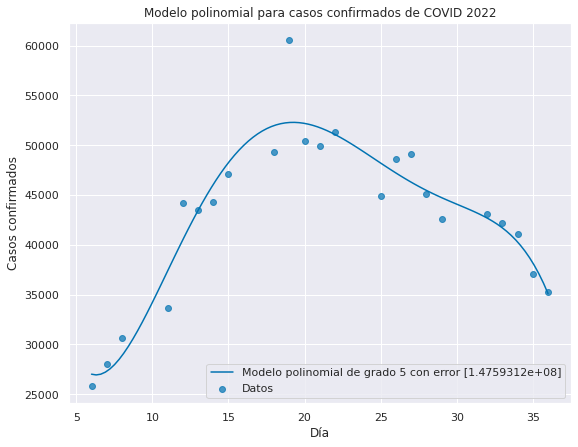

In [ ]:
x = casos_sin_atipicos.index.to_numpy()
y = casos_sin_atipicos['Casos confirmados']
coef = poli_min_cuad(x, y, 5)
X = np.linspace(x[0], x[-1], 100)
plt.figure(figsize=(9,7))
plt.plot(X, poli(coef, X))
plt.scatter(x, y, alpha=0.7)
plt.legend([f'Modelo polinomial de grado 5 con error {err_list[4]}', 'Datos'])
plt.title('Modelo polinomial para casos confirmados de COVID 2022')
plt.xlabel('Día')
plt.ylabel('Casos confirmados')
plt.show()

#### Para los fallecimientos

Encontramos el grado óptimo para el modelado

In [ ]:
x = casos_sin_atipicos.index.to_numpy()
y = casos_sin_atipicos['Fallecimientos']

err_list = []
for i in range(1, 12):
  coef = poli_min_cuad(x, y, i)
  err_list.append(error(coef, x, y))
  print(f"Para el polinomio de grado {i} se tiene un error de {err_list[-1]}")

err_list = np.array(err_list)
print(f"\n\nSe utilizará el grado con menor error, este es el polinomio de grado {np.where(err_list == np.amin(err_list))[0][0] + 1}")

Para el polinomio de grado 1 se tiene un error de [106750.49909843]
Para el polinomio de grado 2 se tiene un error de [96287.09688305]
Para el polinomio de grado 3 se tiene un error de [79635.32442034]
Para el polinomio de grado 4 se tiene un error de [73913.25469187]
Para el polinomio de grado 5 se tiene un error de [71073.57628713]
Para el polinomio de grado 6 se tiene un error de [71073.57748581]
Para el polinomio de grado 7 se tiene un error de [73913.51770898]
Para el polinomio de grado 8 se tiene un error de [79669.27559622]
Para el polinomio de grado 9 se tiene un error de [98312.27546482]
Para el polinomio de grado 10 se tiene un error de [106409.44227809]
Para el polinomio de grado 11 se tiene un error de [793027.48130175]


Se utilizará el grado con menor error, este es el polinomio de grado 5


Utilizando el polinomio de grado 5 obtenemos el siguiente resultado

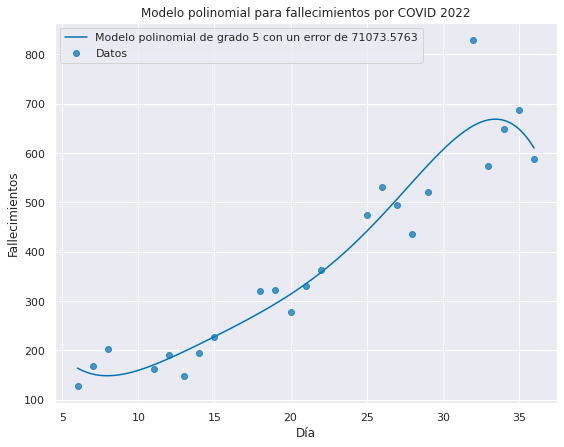

In [ ]:
x = casos_sin_atipicos.index.to_numpy()
y = casos_sin_atipicos['Fallecimientos']
coef = poli_min_cuad(x, y, 5)
X = np.linspace(x[0], x[-1], 100)

plt.figure(figsize=(9,7))
plt.plot(X, poli(coef, X))
plt.scatter(x, y, alpha=0.7)
plt.legend([f'Modelo polinomial de grado 5 con un error de {round(err_list[4][0], 4)}', 'Datos'])
plt.title('Modelo polinomial para fallecimientos por COVID 2022')
plt.xlabel('Día')
plt.ylabel('Fallecimientos')
plt.show()

###Ajuste potencial

In [ ]:
def sumas(x,fx):
  x2=[]
  xy=[]
  for i in range(len(x)):
    x2.append(x[i]**2)
    xy.append(x[i]*fx[i])
  x = np.insert(x,len(x),np.sum(x))
  fx = np.insert(fx,len(fx),np.sum(fx))
  x2.append(np.sum(x2))
  xy.append(np.sum(xy))
  return x,fx,x2,xy

In [ ]:
def mat_err(x,fx,xl,fxl,x2,xy,indi):
  Mat = np.zeros((2,2))
  Sol = np.zeros((2,1))
  Mat[0,0] = Mat[1,1] =  xl[-1]
  Mat[0,1] = len(xl) - 1
  Mat[1,0] = x2[-1]
  Sol[0] = fxl[-1]
  Sol[1] = xy[-1]
  
  Sol = np.dot(np.linalg.inv(Mat),Sol)
  C = np.exp(Sol[1])
  k = []
  er=[]
  for i in range(len(x)-1):
    if indi == 1:
      k.append(C * (x[i]**Sol[0]))
    elif indi == 2:
      k.append(C * np.exp(Sol[0]*x[i]))
    er.append((k[i] - fx[i])**2)
  return k,er

Asignamos x a los días, f(x) a los casos confirmados y gráficamos.

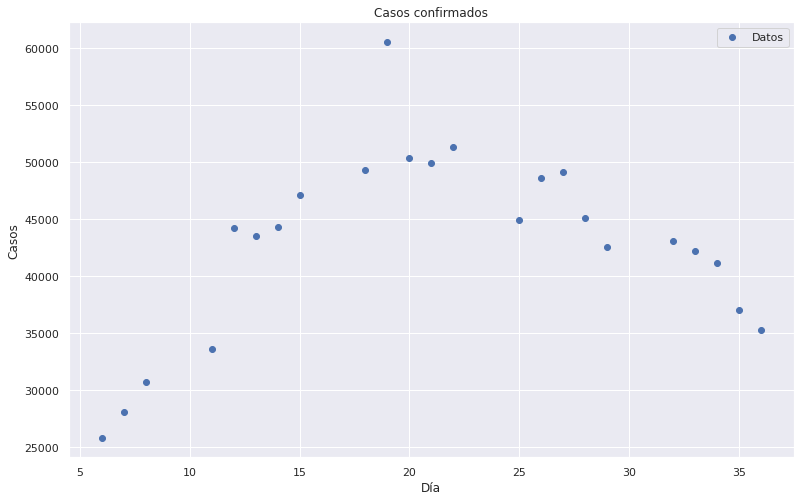

In [ ]:
x = df2.index.to_numpy()
fx = df2.Casos_confirmados.to_numpy()
plt.figure(figsize=(13,8))
plt.scatter(x,fx)
plt.title("Casos confirmados")
plt.xlabel("Día")
plt.ylabel("Casos")
plt.legend(['Datos'])
plt.show()

Linealizamos

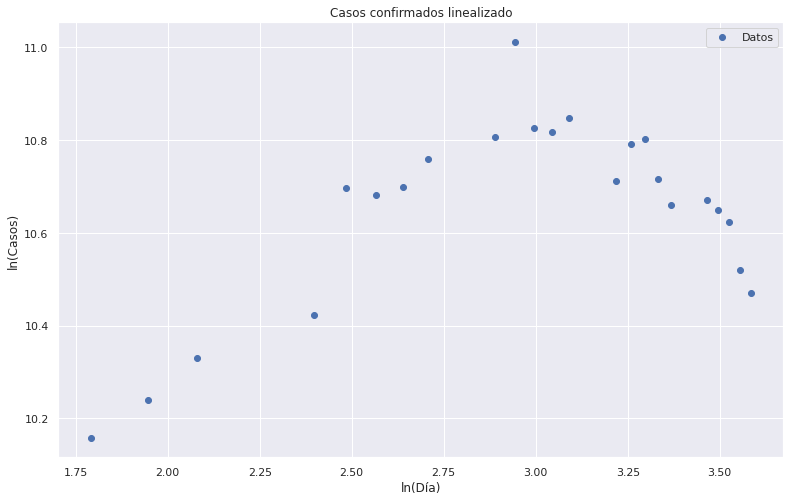

In [ ]:
xl = np.log(x)
fxl = np.log(fx)
plt.figure(figsize=(13,8))
plt.scatter(xl,fxl)
plt.title("Casos confirmados linealizado")
plt.xlabel("ln(Día)")
plt.ylabel("ln(Casos)")
plt.legend(['Datos'])
plt.show()

Obtenemos los siguientes datos linealizados, calculamos $x^{2}$ y $xy$, además calculamos sus sumas.

In [ ]:
xl,fxl,x2,xy = sumas(xl,fxl)
table1={'Xi=ln(Día)': xl,
        'Yi = ln(Casos confirmados)': fxl,
        'X^2': x2,
        'Xi*Yi': xy
}
df3 = pd.DataFrame(table1)
df3

,Xi=ln(Día),Yi = ln(Casos confirmados),X^2,Xi*Yi
0,1.791759,10.158943,3.210402,18.202383
1,1.945910,10.240781,3.786566,19.927639
2,2.079442,10.331073,4.324077,21.482862
3,2.397895,10.423055,5.749902,24.993394
4,2.484907,10.696186,6.174761,26.579023
5,2.564949,10.681045,6.578965,27.396339
6,2.639057,10.698582,6.964624,28.234171
7,2.708050,10.760304,7.333536,29.139444
8,2.890372,10.806551,8.354249,31.234950
9,2.944439,11.011258,8.669721,32.421977


In [ ]:
k,err = mat_err(x,fx,xl,fxl,x2,xy,1)
table2 = {'Xi': x[0:-1],
          'Yi': fx[0:-1],
          'Yi[xi]': k,
          'ei = [Yi[xi]-Yi]^2': err
}
df4 = pd.DataFrame(table2) 
df4

,Xi,Yi,Yi[xi],ei = [Yi[xi]-Yi]^2
0,6,25821,[33187.93670603135],[54271756.43067207]
1,7,28023,[34266.15172503067],[38976943.46175345]
2,8,30671,[35228.417713372124],[20770056.214158002]
3,11,33626,[37633.773788669794],[16062250.741148636]
4,12,44187,[38319.09963411544],[34432254.70394817]
5,13,43523,[38960.55377009272],[20815915.60079512]
6,14,44293,[39564.01669858985],[22363283.065016072]
7,15,47113,[40134.22587471055],[48703288.29180951]
8,18,49343,[41680.93522440276],[58707236.625447966]
9,19,60552,[42150.96727003624],[338598005.52919745]


###Exponencial

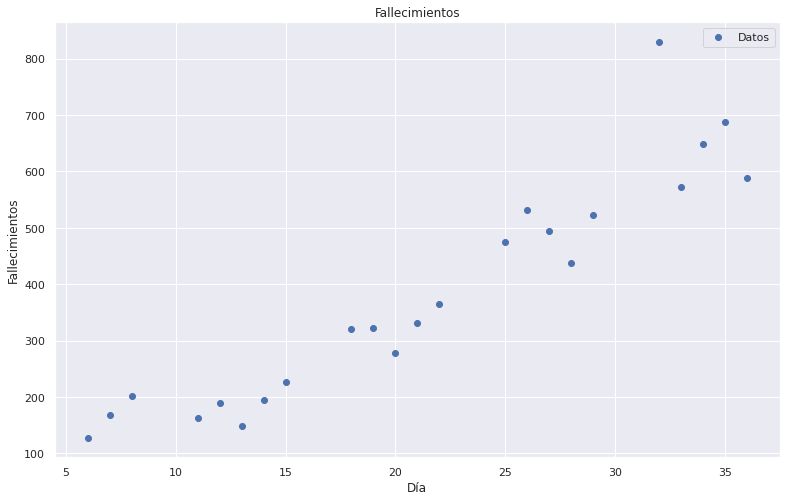

In [ ]:
xe = df2.index.to_numpy()
fxe = df2.Fallecimientos.to_numpy()
plt.figure(figsize=(13,8))
plt.scatter(xe,fxe)
plt.title("Fallecimientos")
plt.xlabel("Día")
plt.ylabel("Fallecimientos")
plt.legend(["Datos"])
plt.show()

Linealizamos

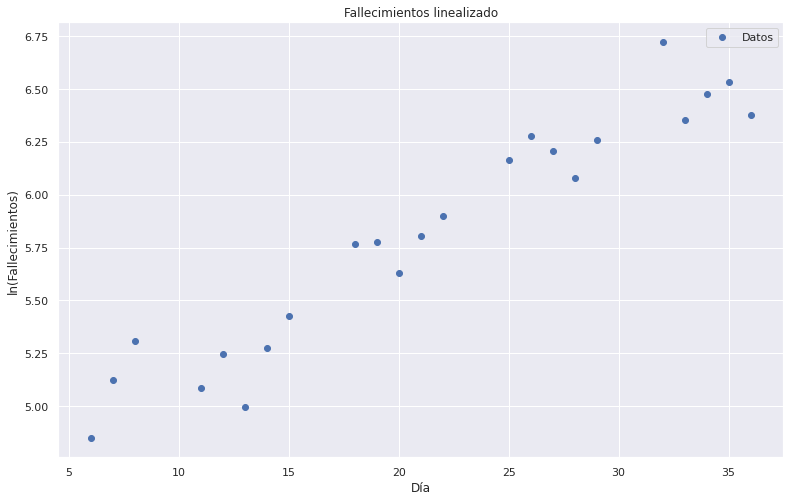

In [ ]:
fxel = np.log(fxe)
plt.figure(figsize=(13,8))
plt.scatter(xe,fxel)
plt.title("Fallecimientos linealizado")
plt.xlabel("Día")
plt.ylabel("ln(Fallecimientos)")
plt.legend(["Datos"])
plt.show()

In [ ]:
xe,fxel,x2e,xye=sumas(xe,fxel)
table1={'Xi=Día': xe,
        'Yi = ln(Fallecimientos)': fxel,
        'X^2': x2e,
        'Xi*Yi': xye
}
df5 = pd.DataFrame(table1)
df5

,Xi=Día,Yi = ln(Fallecimientos),X^2,Xi*Yi
0,6,4.852030,36,29.112182
1,7,5.123964,49,35.867748
2,8,5.308268,64,42.466142
3,11,5.087596,121,55.963560
4,12,5.247024,144,62.964289
5,13,4.997212,169,64.963760
6,14,5.273000,196,73.821994
7,15,5.424950,225,81.374250
8,18,5.768321,324,103.829778
9,19,5.777652,361,109.775394


In [ ]:
k,err = mat_err(xe,fxe,xe,fxel,x2e,xye,2)
table2 = {'Xi': xe[0:-1],
          'Yi': fxel[0:-1],
          'Yi[xi]': k,
          'ei = [Yi[xi]-Yi]^2': err
}
df6 = pd.DataFrame(table2) 
df6

,Xi,Yi,Yi[xi],ei = [Yi[xi]-Yi]^2
0,6,4.852030,[140.72460349648088],[161.91553414265348]
1,7,5.123964,[148.86376008388848],[366.1956781269799]
2,8,5.308268,[157.47366498614912],[1982.5945097656831]
3,11,5.087596,[186.40810330375933],[595.7555068869873]
4,12,5.247024,[197.1894784453769],[51.68860031653893]
5,13,4.997212,[208.59442116739552],[3671.6838766117107]
6,14,5.273000,[220.65899704792756],[658.384129505555]
7,15,5.424950,[233.42135760727564],[41.23383352051671]
8,18,5.768321,[276.3105345010414],[1908.7693955846948]
9,19,5.777652,[292.2916398030044],[943.0033859884245]


## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)